## Activity 4.01: Optimizing a Luxury Clothing Brand's Marketing Campaign using Clustering

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

data0 = pd.read_csv('https://raw.githubusercontent.com/johnson80245/python/refs/heads/main/csvs/DS%20for%20marketing%20analytics%20data/Chapter04/Datasets/Clothing_Customers.csv')
data0.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [2]:
cluster_cols = data0.columns
data_scaled = data0.copy()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled[cluster_cols] = scaler.fit_transform\
                            (data0[cluster_cols])

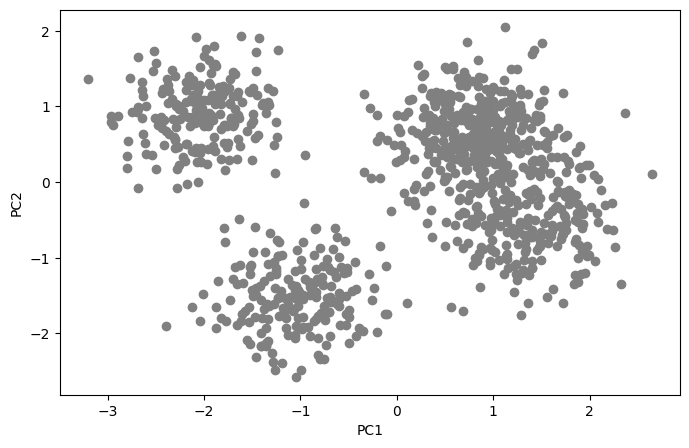

In [4]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

plt.figure(figsize=[8,5])
plt.scatter(data_scaled.pc1, data_scaled.pc2, color='gray')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

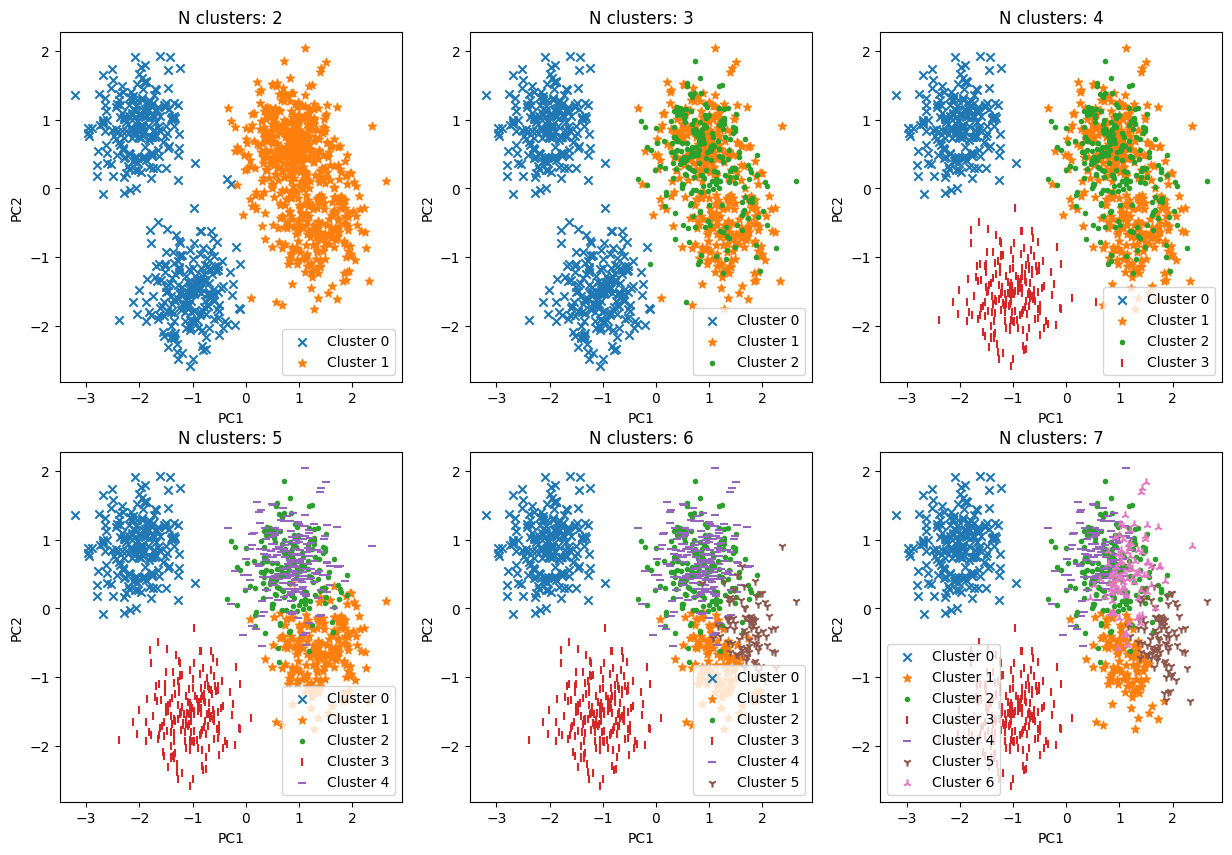

In [5]:
from sklearn.cluster import KMeans

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[15,10])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    data_scaled['Cluster']= model.fit_predict\
                            (data_scaled[cluster_cols])

    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = data_scaled[data_scaled.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, \
                    marker=markers[clust], \
                    label="Cluster "+str(clust))
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend()
        plt.title("N clusters: "+str(n))

plt.show()

In [6]:
inertia_scores = []

for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42)\
              .fit(data_scaled).inertia_
    inertia_scores.append(inertia)

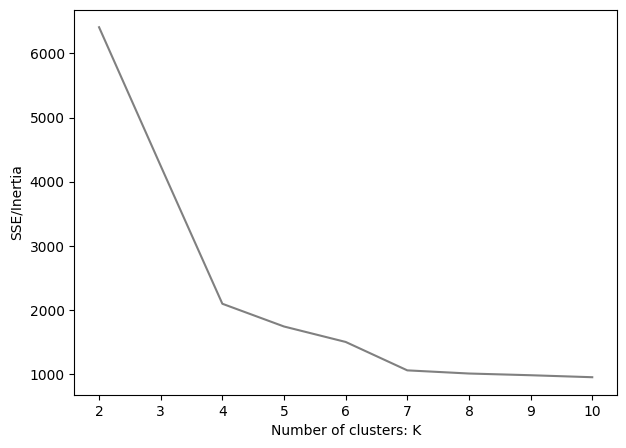

In [9]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

## Activity 4.02: Evaluating Clustering on Customer Data

In [8]:
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('customer_offers.csv')

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [12]:
from sklearn import model_selection

X_train, X_test = model_selection.train_test_split\
                  (df, random_state = 100)

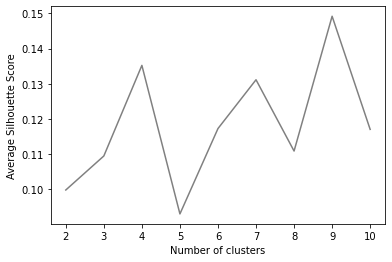

In [13]:
krange = list(range(2,11))
avg_silhouettes = []

for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_train)

    silhouette_avg = metrics.silhouette_score(X_train, \
                                              cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [14]:
model = cluster.KMeans(n_clusters=4, random_state=100)
model.fit(X_train)

km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.09173391407243832


In [15]:
bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1)

ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

ms_labels = ms.predict(X_test)

ms_silhouette = metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


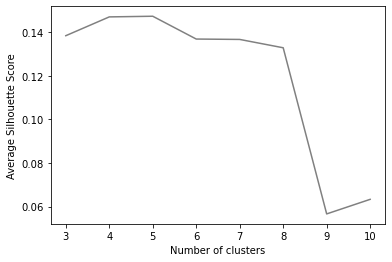

In [16]:
from kmodes.kmodes import KModes

krange = list(range(3,11))
avg_silhouettes = []

for n in krange:
    
    km = KModes(n_clusters=n, random_state=100)
    km.fit(X_train)

    kmode_labels = km.predict(X_train)
    kmode_silhouette = metrics.silhouette_score\
                       (X_train, kmode_labels)
    avg_silhouettes.append(kmode_silhouette)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [16]:
km = KModes(n_clusters=4, random_state=100)
km.fit(X_train)

kmode_labels = km.predict(X_test)
kmode_silhouette = metrics.silhouette_score\
                   (X_test, kmode_labels)

print('k-mode silhouette score: ' + str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501
